In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) ## suppress annoying deprecation warnings

import pandas as pd
import seaborn.objects as so
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style

from sklearn.preprocessing import StandardScaler

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Part 2 Data exploration by unsupervised learning

In [2]:
# Renaming columns for better axis labels in plots
col_rename = {
	'tavg': 'Temp_Avg_°C',
	'tmax': 'Temp_Max_°C',
	'tmin': 'Temp_Min_°C',
	'rhum': 'Rel_Humidity_%',
	'coco': 'Condition',
	'wspd': 'Wind_Speed_kmh',
	'prcp': 'Precipation_mm',
	'wdir': 'Wind_Direction_°',
	'pres': 'Air_pressure_hPa',
	'dwpt': 'Dew_point_°C'
}

In [3]:
## Reload data
weather_df = pd.read_csv('global_weather.csv', parse_dates=['time'], dtype={'wmo':str, 'station':str}) 
weather_df = weather_df.dropna()

weather_df.rename(columns=col_rename, inplace=True)

weather_df = weather_df.assign(Continent = weather_df["timezone"].str.split('/').str[0])  ## Get continent from timezone column

## Dimension reduction by PCA and t-SNE

In [4]:
weather_df.select_dtypes(include='number') ## Only on numerical attributes of weather data 

latitude  longitude  elevation  Dew_point_°C  Rel_Humidity_%  \
0      34.0167    71.5833      359.0          11.0           100.0   
1      34.0167    71.5833      359.0          10.0           100.0   
2      34.0167    71.5833      359.0           5.0            94.0   
3      34.0167    71.5833      359.0           3.0            54.0   
4      34.0167    71.5833      359.0           1.9            50.0   
...        ...        ...        ...           ...             ...   
3687   28.4500   -13.8667       22.0          18.0            78.0   
3688   28.4500   -13.8667       22.0          15.9            57.0   
3689   28.4500   -13.8667       22.0          16.9            73.0   
3690   28.4500   -13.8667       22.0          16.2            69.0   
3691   28.4500   -13.8667       22.0          11.1            47.0   

      Temp_Avg_°C  Temp_Min_°C  Temp_Max_°C  Precipation_mm  Wind_Direction_°  \
0            12.3          9.6         13.0             5.1             334.0   
1            10.8          9.0         12.5            65.0              12.0   
2             8.9          5.5         13.0            16.0             330.0   
3            11.3          4.5         18.0             0.0             270.0   
4            13.7          5.5         21.5             0.0             222.0   
...           ...          ...          ...             ...               ...   
3687         19.9         16.7         22.0             0.0              32.0   
3688         23.0         18.8         28.0             0.0               0.0   
3689         21.9         20.0         26.0             0.0             331.0   
3690         20.2         18.0         23.0             0.0              19.0   
3691         20.2         17.4         24.0             0.0               6.0   

      Wind_Speed_kmh  Air_pressure_hPa  
0                7.3            1015.4  
1               11.7            1005.5  
2               20.4            1012.6  
3               14.2            1020.1  
4               13.7            1019.3  
...              ...               ...  
3687            12.2            1018.1  
3688            12.5            1016.2  
3689            27.7            1016.2  
3690            24.9            1017.0  
3691            29.7            1018.5  

[2825 rows x 12 columns]

In [9]:
scaler = StandardScaler().set_output(transform="pandas") # Features need to be scaled for dimension reduction

#!# weather_d2_tsne = TSNE(n_components=?, perplexity=100, random_state=42).fit_transform(			## Define and perform dimension reduction
weather_d2_tsne = TSNE(n_components=2, perplexity=100, random_state=42).fit_transform(			## Define and perform dimension reduction
							scaler.fit_transform(weather_df.select_dtypes(include='number')) 	## Scale Data first; only numerical features can be used
							)
#!# weather_d2_pca = PCA(n_components=?).fit_transform(
weather_d2_pca = PCA(n_components=2).fit_transform(
							scaler.fit_transform(weather_df.select_dtypes(include='number'))
							)

weather_df = weather_df.assign(TSNE1= weather_d2_tsne[:,0]) ## Add as additional columns for easy plotting
weather_df = weather_df.assign(TSNE2= weather_d2_tsne[:,1])

weather_df = weather_df.assign(PC1= weather_d2_pca[:,0])
weather_df = weather_df.assign(PC2= weather_d2_pca[:,1])

## Scatter plots
### (1) simple plot with no additional information

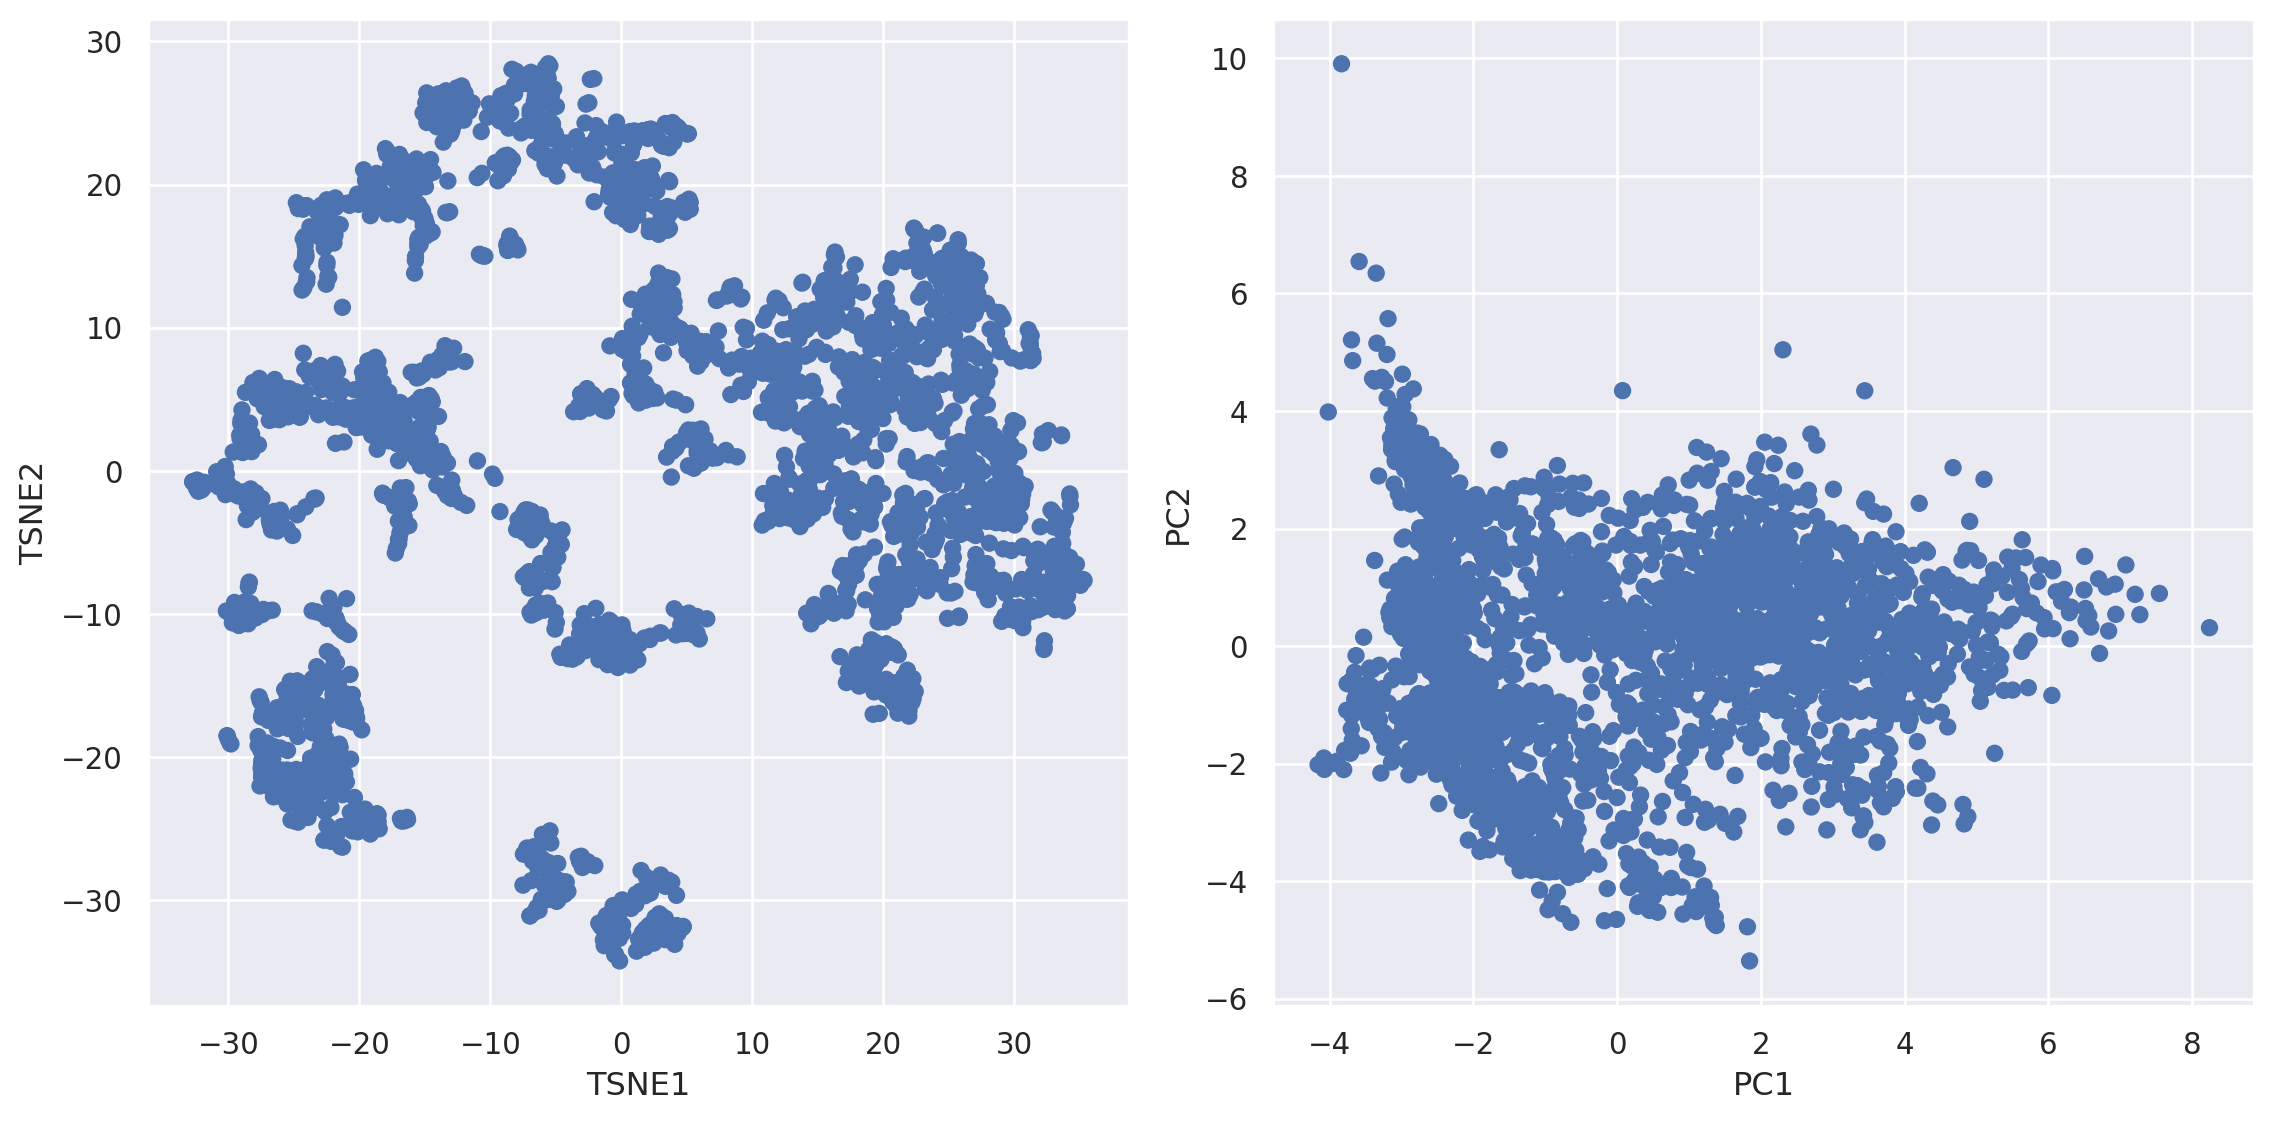

In [11]:
(
    so.Plot(weather_df)
#!# .pair(x=["TSNE1","PC1"], y=["TSNE2","PC2"], cross=??) # pair as cousin of facet (sharing of axes)
	.pair(x=["TSNE1","PC1"], y=["TSNE2","PC2"], cross=False) # pair as cousin of facet (sharing of axes)
    .layout(size=(12, 6))
    .add(so.Dot())
)

### (2) After reducing to two dimension we can overlay with numerical and categorical features for exploration of potential clusters

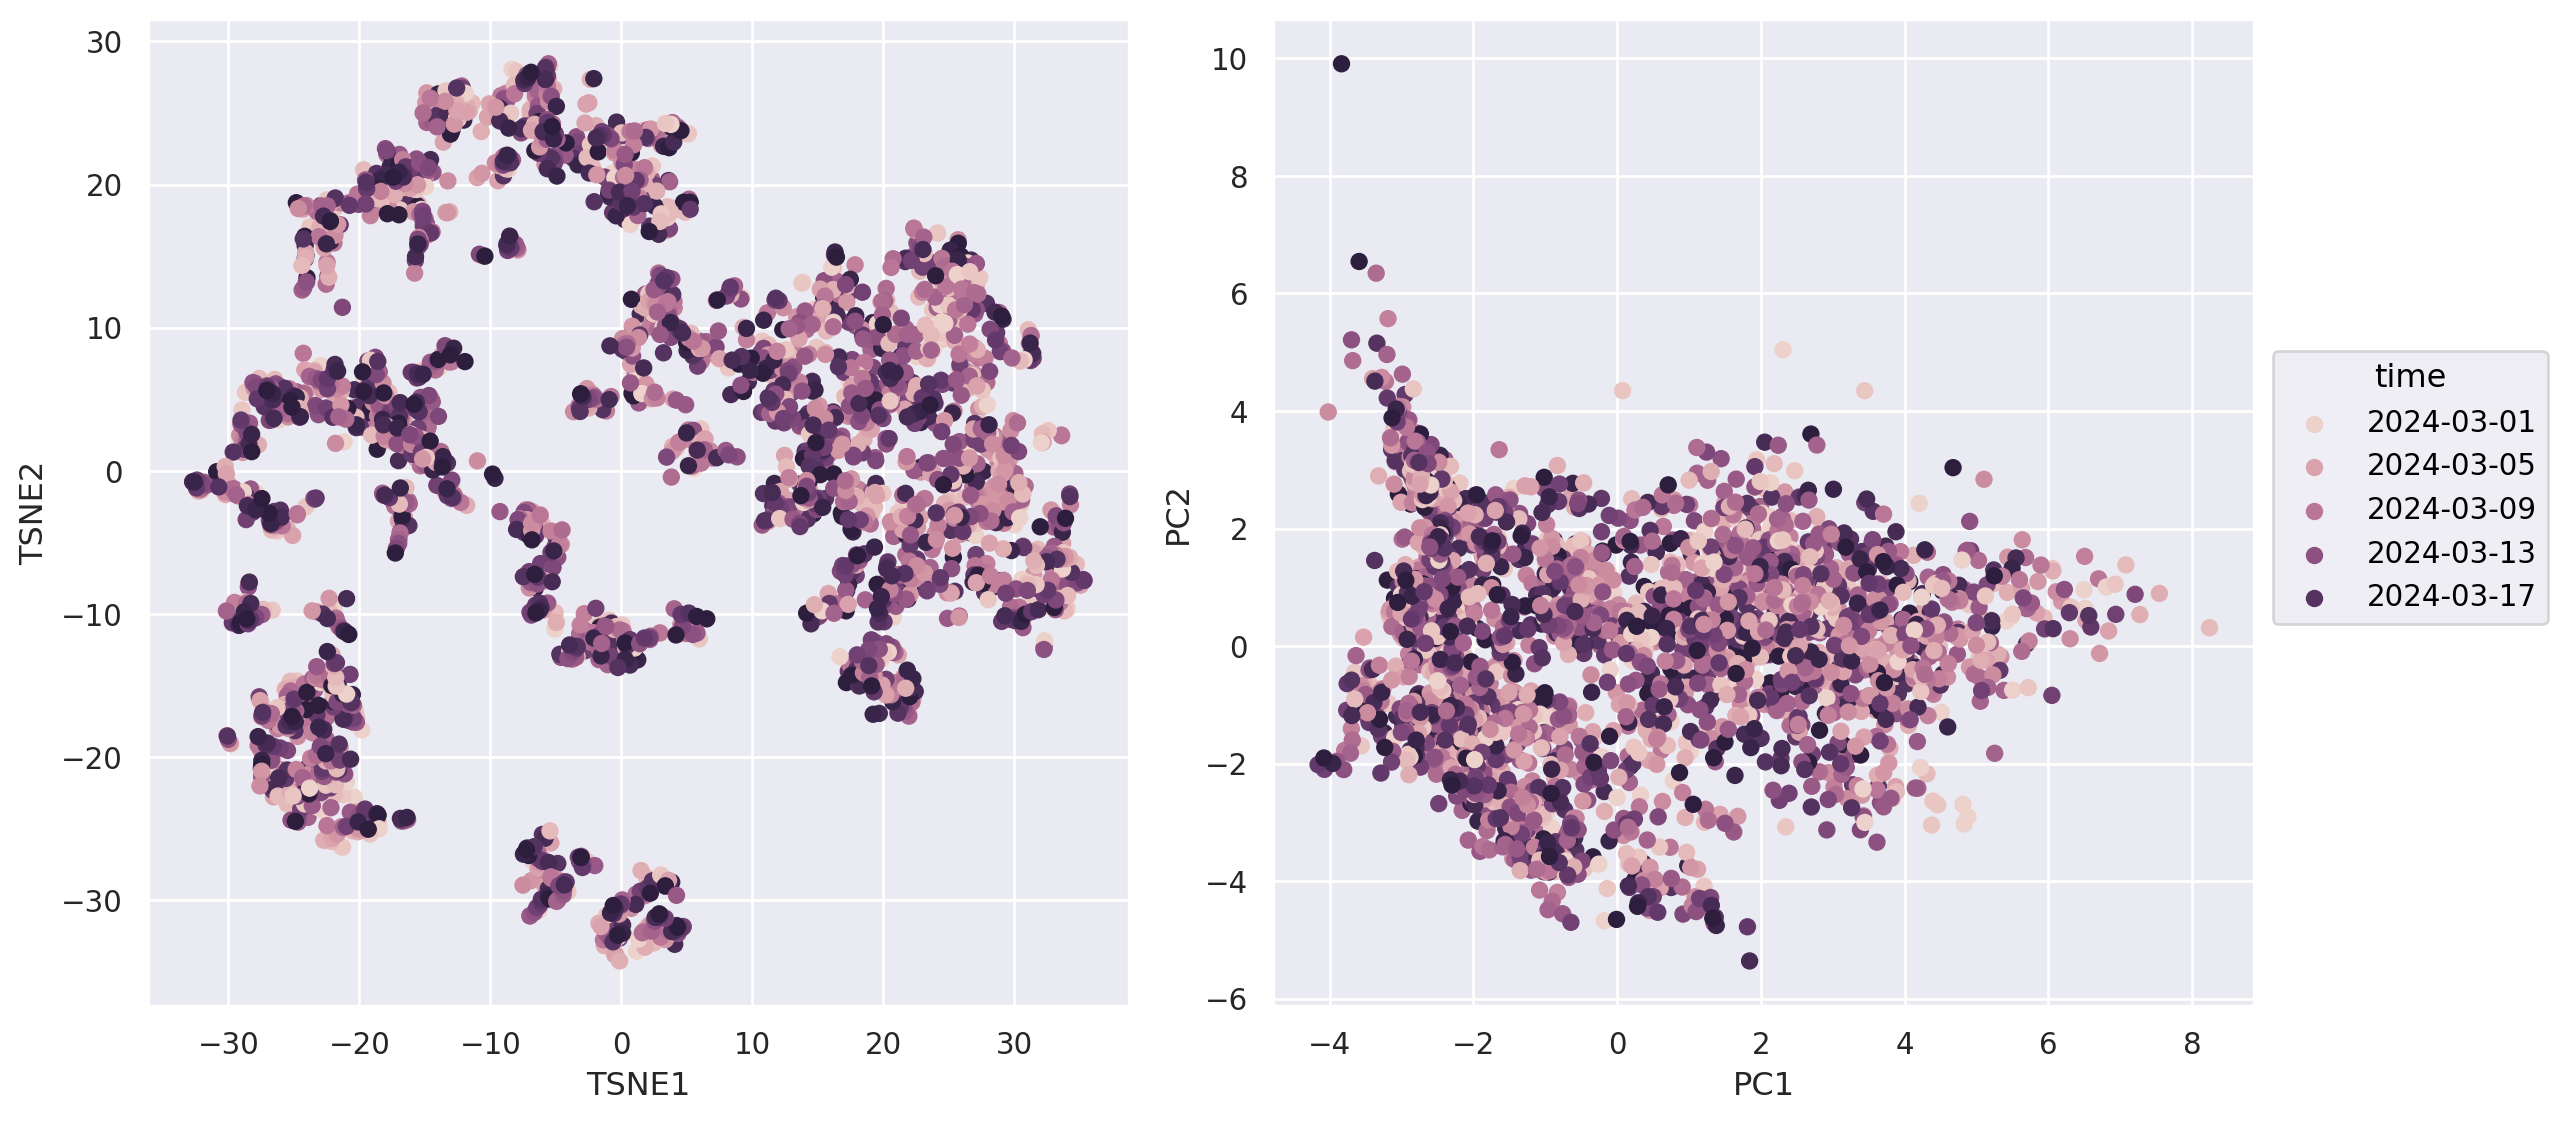

In [12]:
(
#!# so.Plot(weather_df, color=??)
	so.Plot(weather_df, color="time")
    .pair(x=["TSNE1","PC1"], y=["TSNE2","PC2"], cross=False)
    .layout(size=(12, 6))
    .add(so.Dot())
)

### (3) How about atmospheric pressure?

Interestingly, intuitive color assignment for low/high pressure seems to be reversed in US (https://as1.ftcdn.net/v2/jpg/02/74/36/92/1000_F_274369230_Kvnl7UddxtOPCV0CDMwX6I0y6m1GezDo.jpg) compared to Germany (https://bluewhale.ch/wp-content/uploads/2020/02/Profi-Isobaren-Wetter-Karte.jpg)

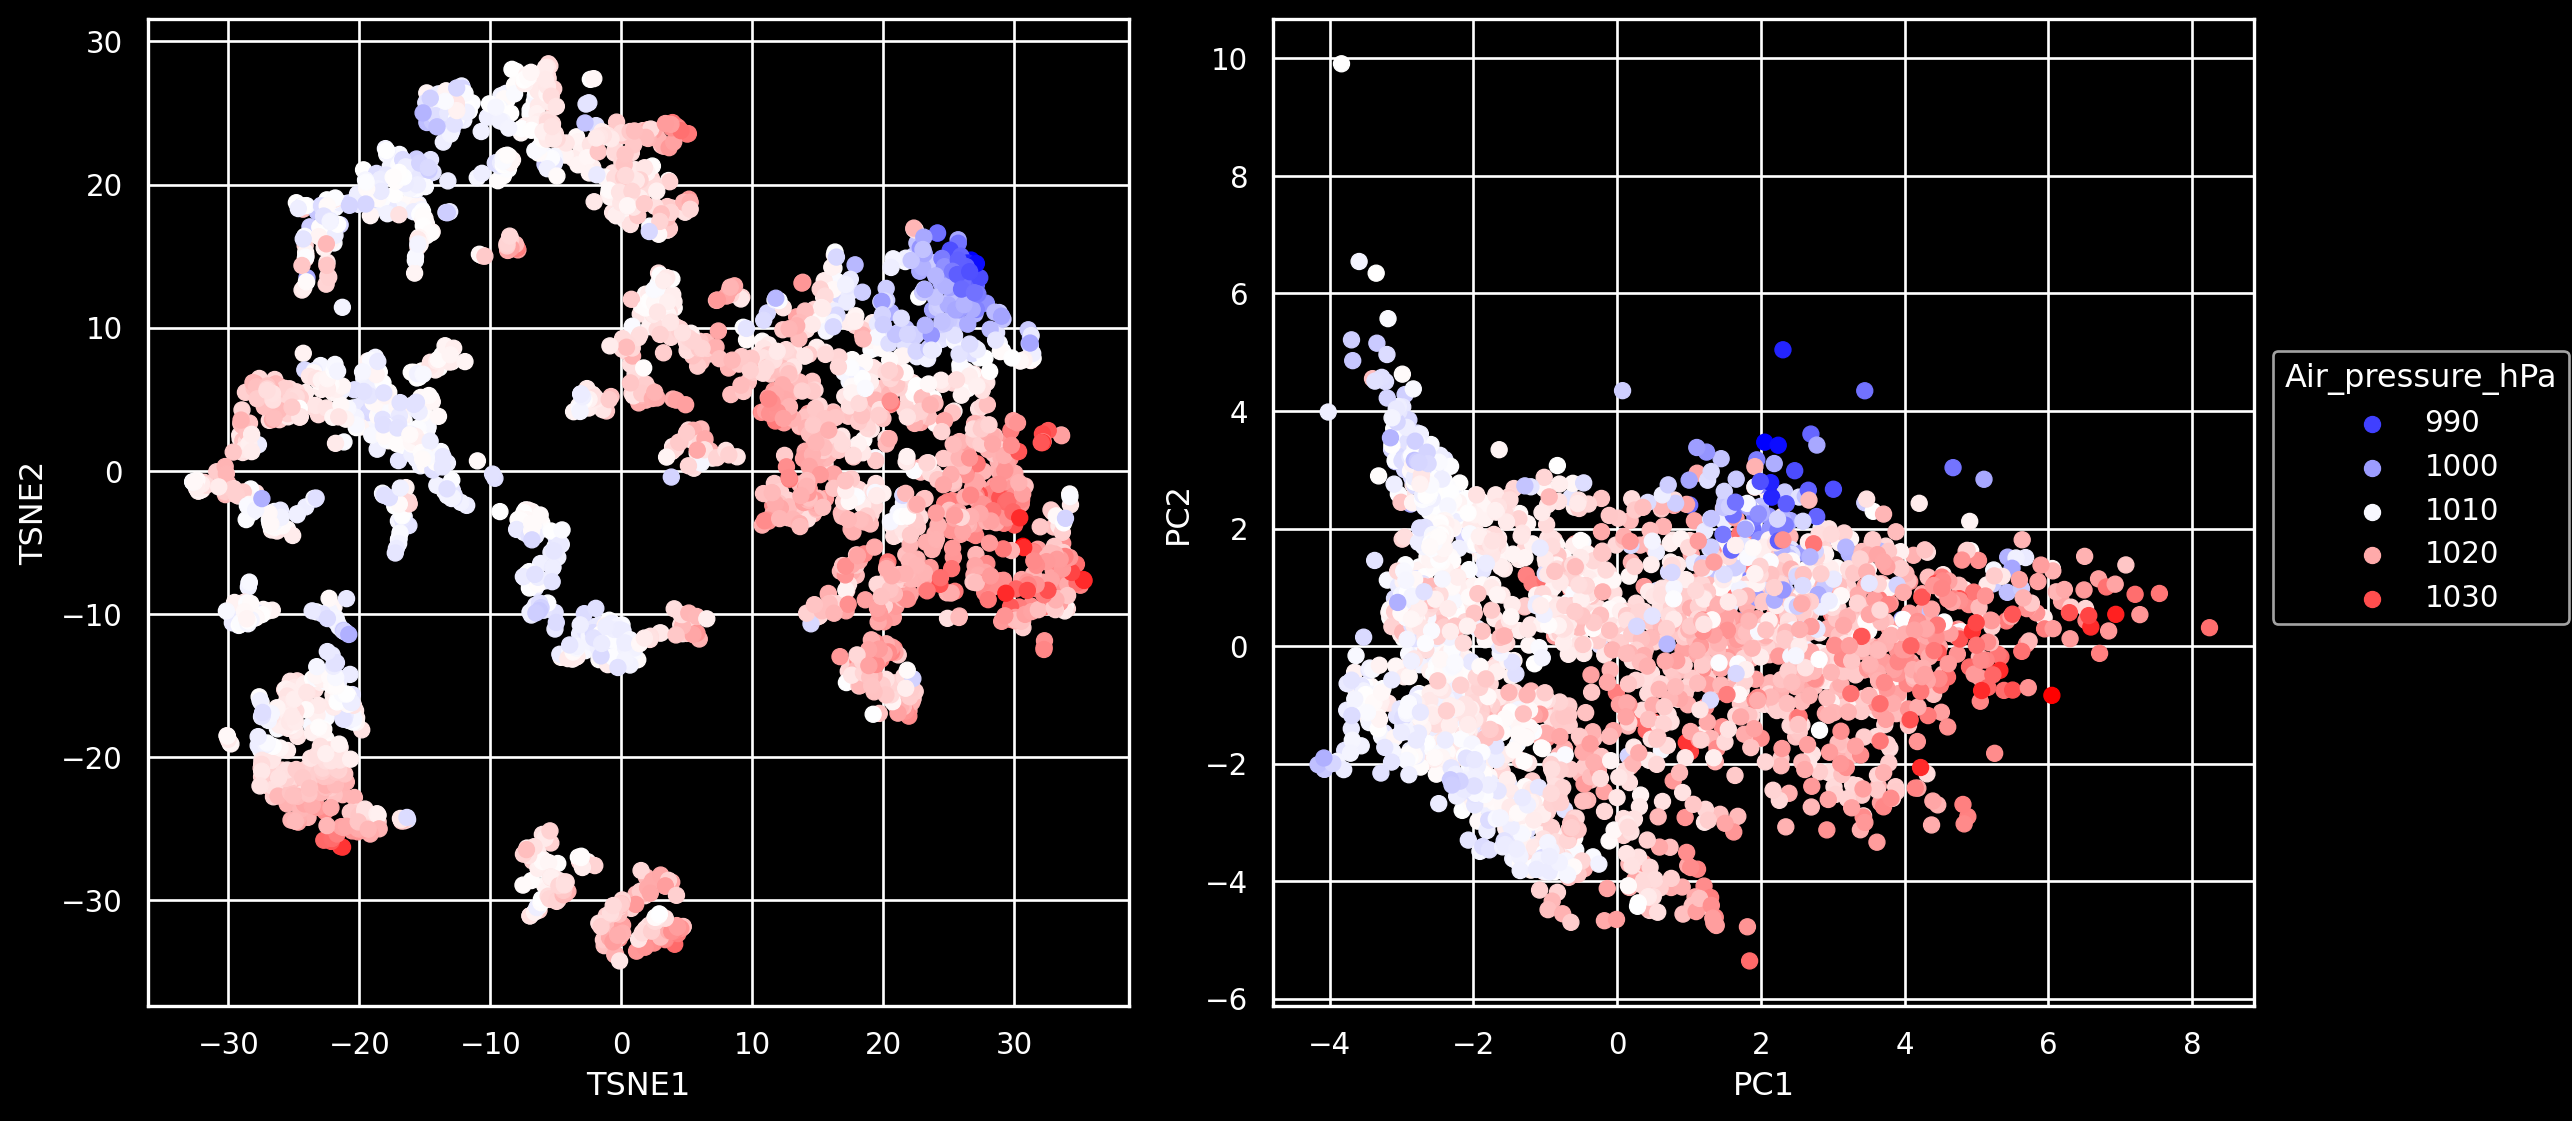

In [13]:
(
    so.Plot(weather_df, color="Air_pressure_hPa")
    .pair(x=["TSNE1","PC1"], y=["TSNE2","PC2"], cross=False)
#!# .scale(color=so.Continuous(??).tick(upto=10)) ## Again important to choose an intuitive colormap. 
    .scale(color=so.Continuous("bwr").tick(upto=10)) ## Again important to choose an intuitive colormap. 
    .layout(size=(12, 6))
    .add(so.Dot())
	.theme({**style.library["dark_background"]})  ## If midpoint is white, a dark background is desirable
)

## Tackling the overplotting issue in scatter plots

Strategies:
1) smaller markers
2) transparency to show density
3) marker edges 

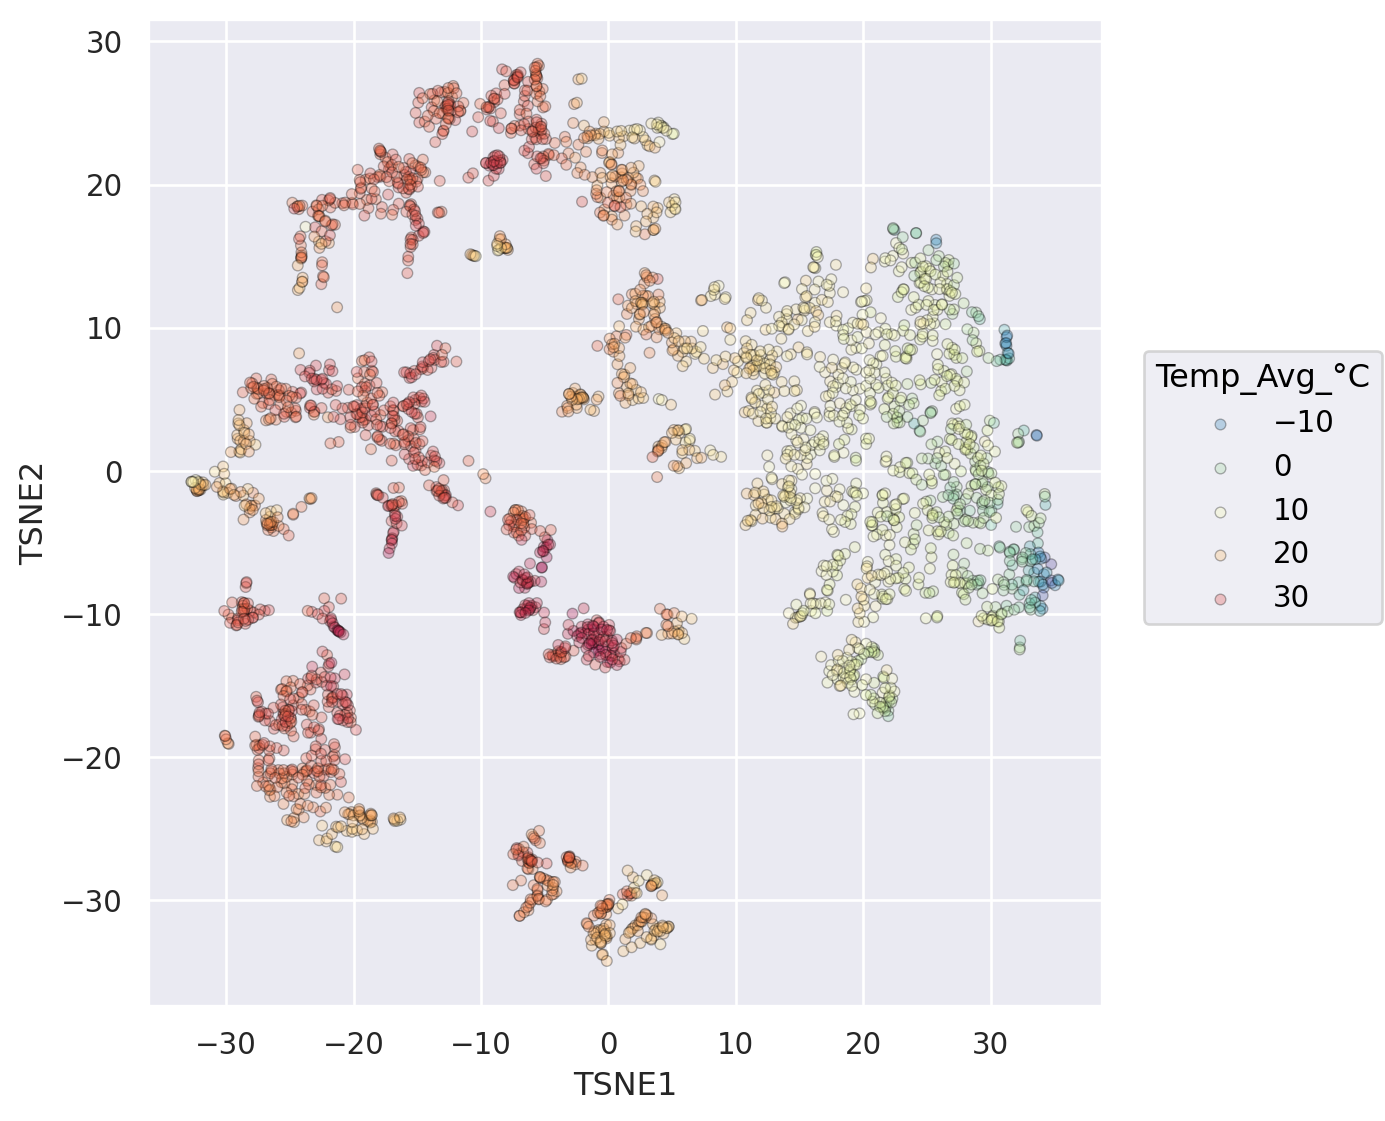

In [14]:
(
    so.Plot(weather_df, x="TSNE1", y="TSNE2", color="Temp_Avg_°C")
#!#	.add(so.Dot(alpha=??, pointsize=??, edgecolor="black")) # adjusting pointsize, introduce transparency, edges increase visibility (dark, bright)
	.add(so.Dot(alpha=0.3, pointsize=4, edgecolor="black")) # adjusting pointsize, introduce transparency, edges increase visibility (dark, bright)
	.scale(color=so.Continuous("Spectral_r").tick(upto=7)) # reverse
	.layout(size=(6, 6))
)

## Avoid overplotting by facet subgroups

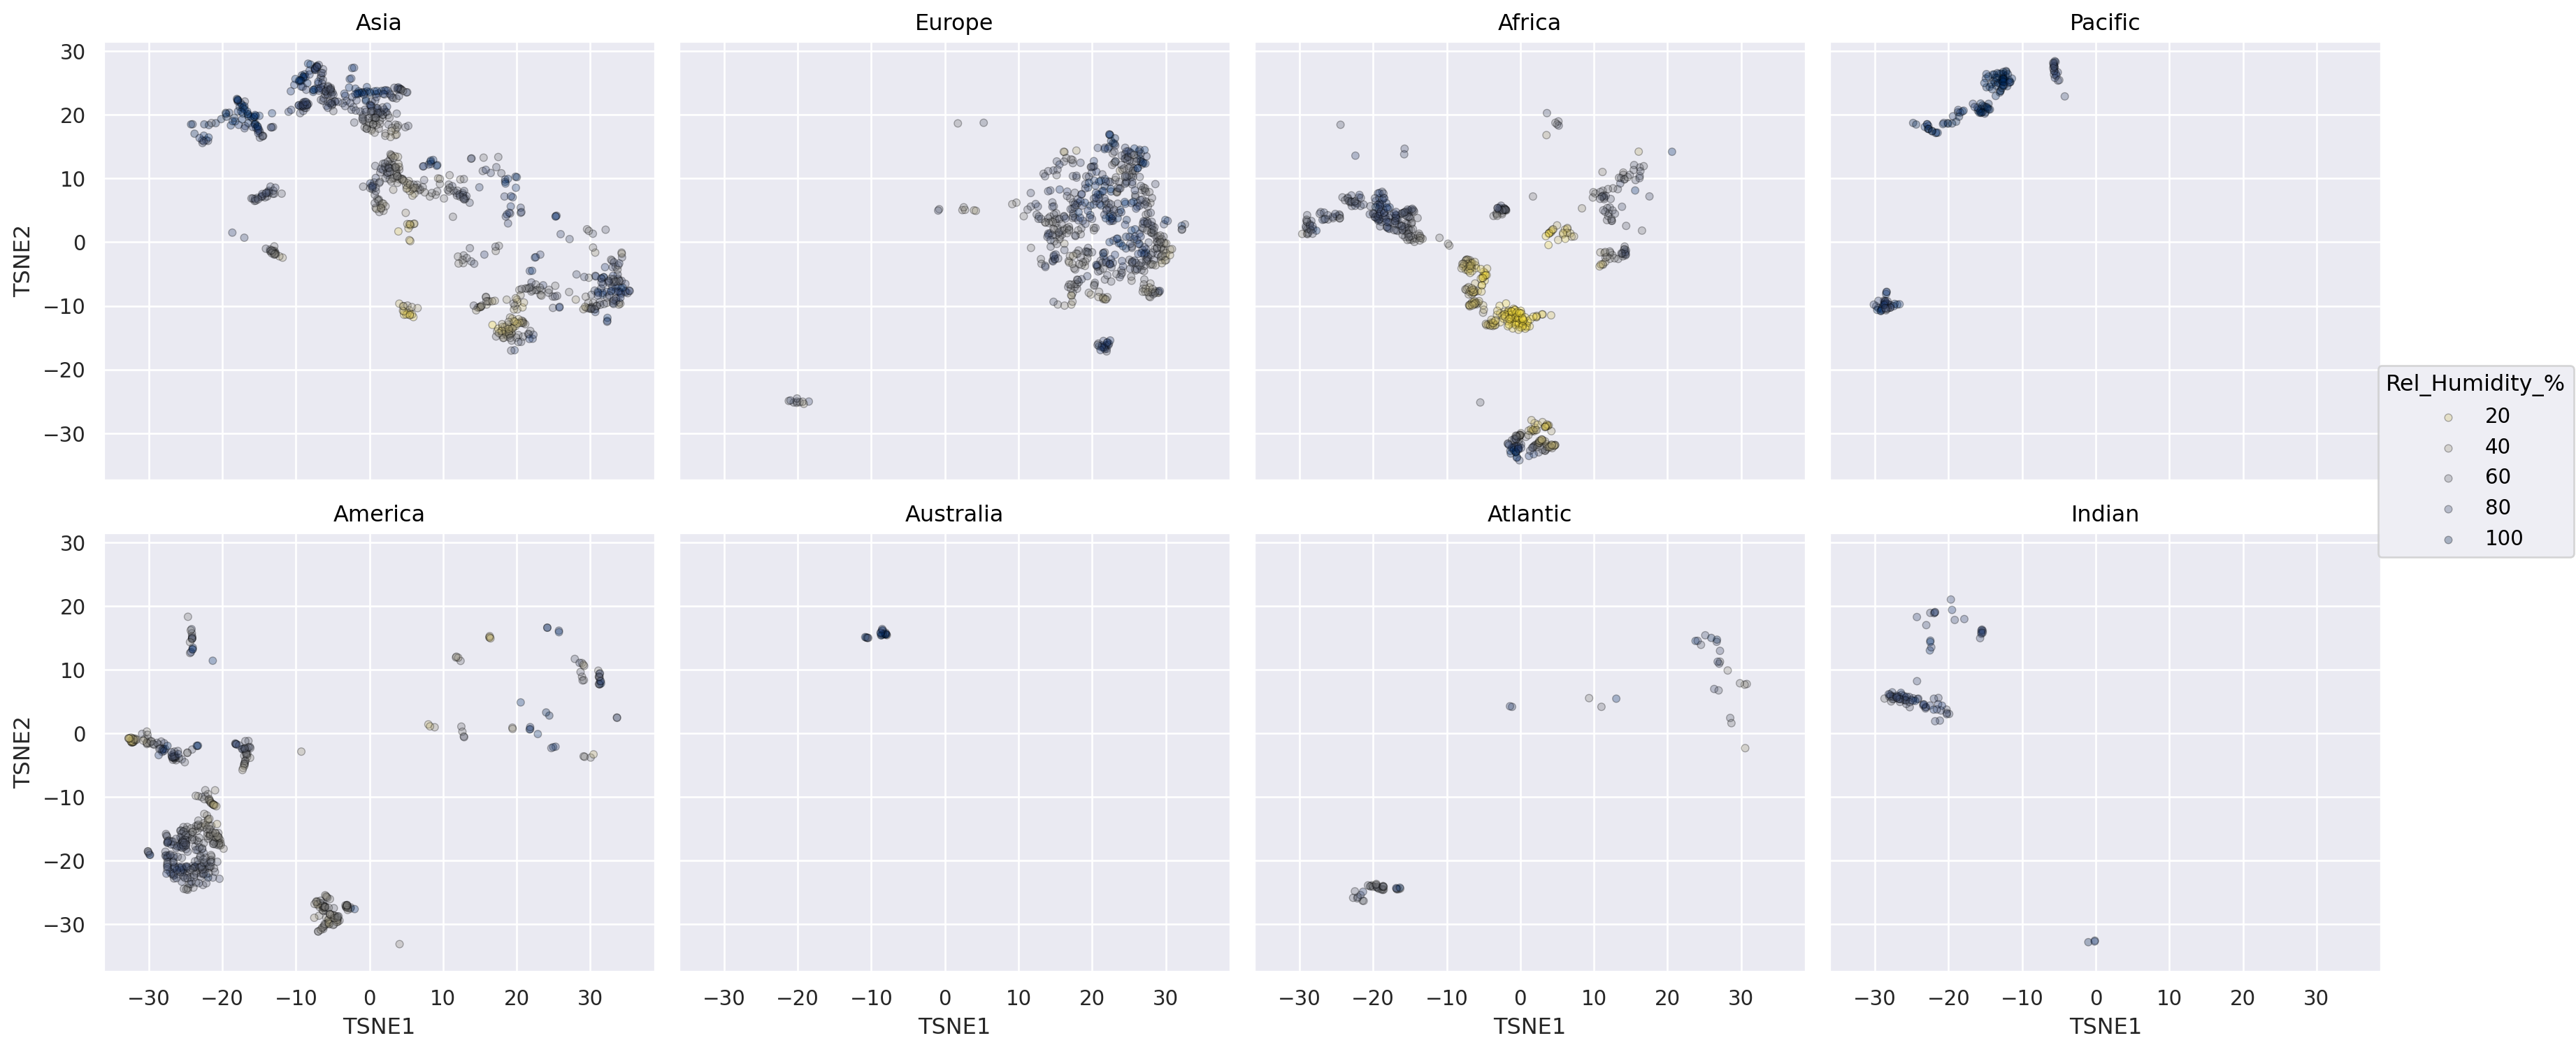

In [15]:
(
	so.Plot(weather_df, x="TSNE1", y="TSNE2", color="Rel_Humidity_%")
	# .facet(??, wrap=4).layout(size=(18, 8))
	.facet("Continent", wrap=4).layout(size=(18, 8))
    .add(so.Dot(alpha=0.3, pointsize=4, edgecolor="black"))
	.scale(color="cividis_r")
)

## Alternative: 2D density and histogram plots (unfortunately not available via seaborn.object API)

<Axes: xlabel='TSNE1', ylabel='TSNE2'>

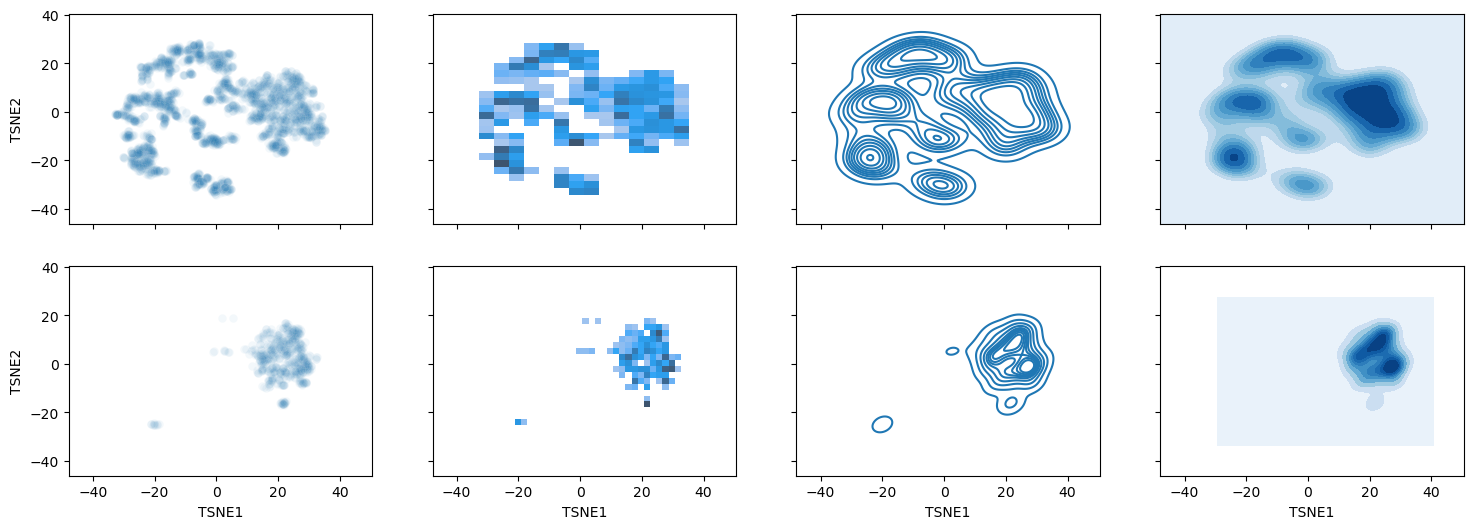

In [21]:
f, axes = plt.subplots(2,4, figsize=(18, 6), sharex=True, sharey=True)

sns.scatterplot(data=weather_df ,x="TSNE1", y="TSNE2", ax=axes[0,0], alpha=0.05)	## Scatter plot with very low alpha
sns.histplot(data=weather_df ,x="TSNE1", y="TSNE2", ax=axes[0,1])					## Tiles showing density (low resolution)
sns.kdeplot(data=weather_df ,x="TSNE1", y="TSNE2", ax=axes[0,2])					## Isoclines of density (high resolution)
#!# sns.kdeplot(data=weather_df ,x="TSNE1", y="TSNE2", ax=axes[0,3], fill=True, thresh=0, levels=??, cmap="Blues",)	## Filled density (high resolution) 
sns.kdeplot(data=weather_df ,x="TSNE1", y="TSNE2", ax=axes[0,3], fill=True, thresh=0, levels=10, cmap="Blues",)	## Filled density (high resolution) 
## try out high number of levels -> what is maximum number you can discriminate before blurring out?


## For a single continent for comparison 
sns.scatterplot(data=weather_df.where(weather_df['Continent'] == "Europe") ,x="TSNE1", y="TSNE2", ax=axes[1,0], alpha=0.05)
sns.histplot(data=weather_df.where(weather_df['Continent'] == "Europe") ,x="TSNE1", y="TSNE2", ax=axes[1,1])
sns.kdeplot(data=weather_df.where(weather_df['Continent'] == "Europe") ,x="TSNE1", y="TSNE2", ax=axes[1,2])
sns.kdeplot(data=weather_df.where(weather_df['Continent'] == "Europe") ,x="TSNE1", y="TSNE2", ax=axes[1,3], fill=True, thresh=0, levels=10, cmap="Blues")

## Analysis of clusters

In [23]:
clustering = KMeans(n_clusters=8, random_state=42).fit(
#!# clustering = KMeans(n_clusters=??, random_state=42).fit(
	StandardScaler().fit_transform(
		weather_d2_tsne
			)
		)

clustering.labels_

array([0, 3, 0, ..., 2, 7, 7], dtype=int32)

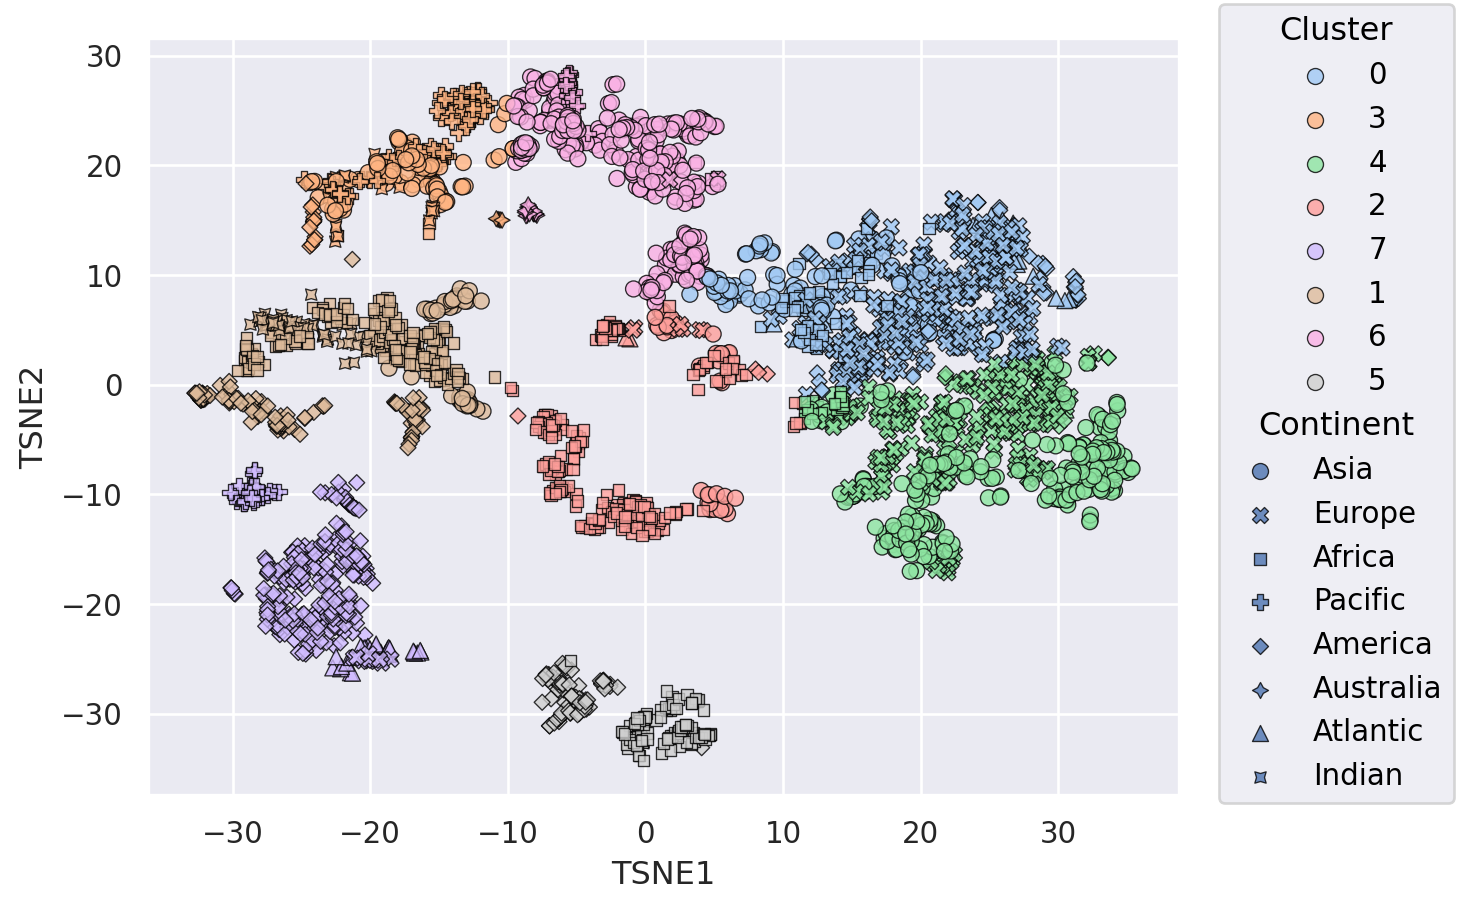

In [24]:
weather_df = weather_df.assign(Cluster= [str(x) for x in clustering.labels_]) ## Add Cluster labels to dataframe for plotting

(
	so.Plot(weather_df, x="TSNE1", y="TSNE2", color="Cluster", marker="Continent") # Try out visualize cluster assignment by color and marker
    .add(so.Dot(alpha=0.8, pointsize=6, edgecolor="black"))	
	.scale(color="pastel") # Important to use a colormap for categorical data
)

### Let's have a look on Cluster if it is enriched with European cities

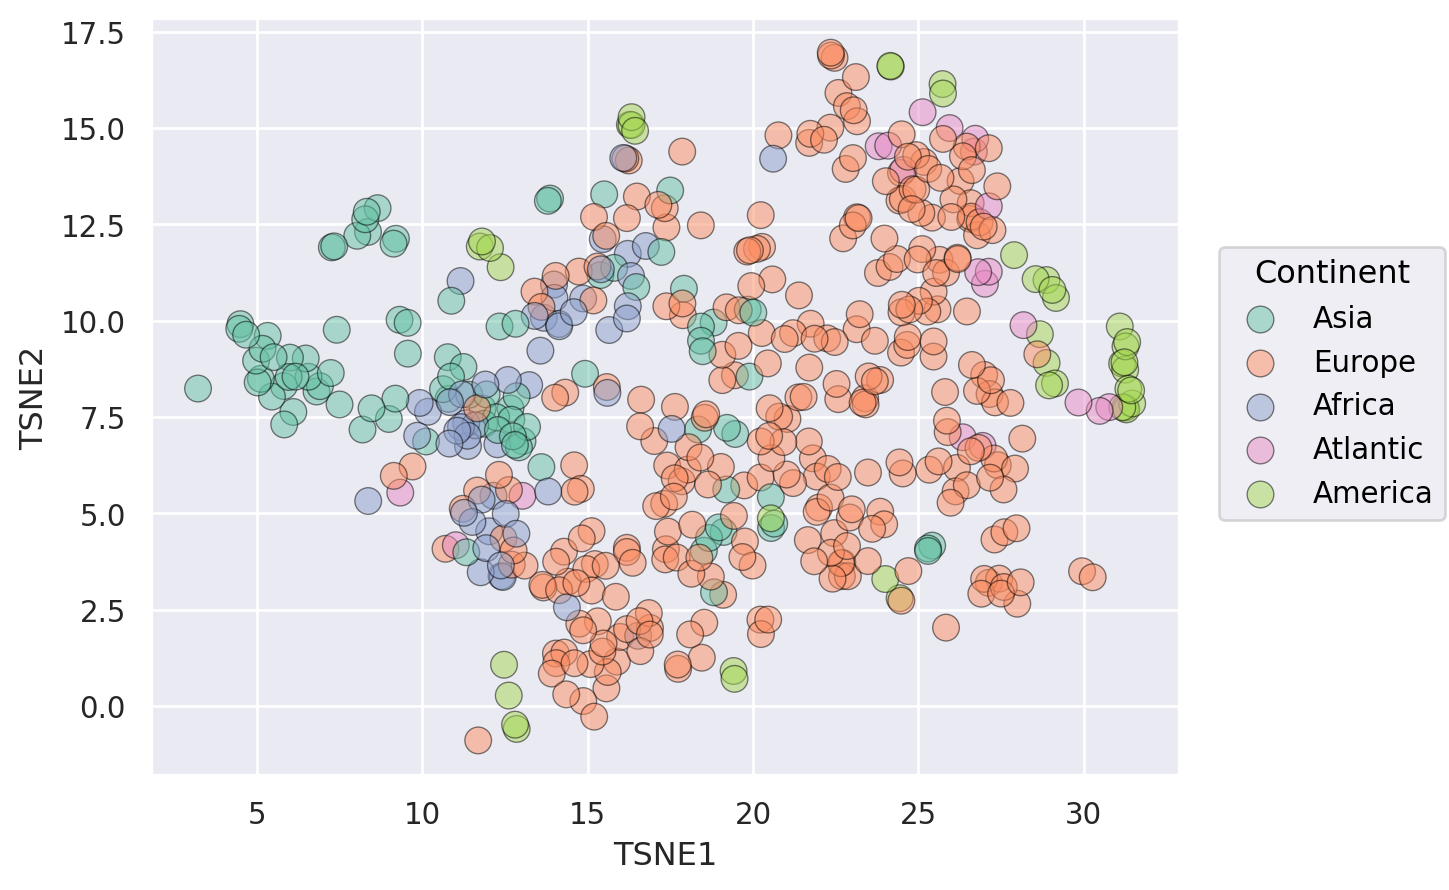

In [25]:
(
	so.Plot(weather_df.loc[weather_df["Cluster"]== "0",:], x="TSNE1", y="TSNE2", color="Continent")  # try marker and color
#!# so.Plot(weather_df.loc[weather_df["Cluster"]== "0",:], x="TSNE1", y="TSNE2", ??="Continent")  # try marker and color
    .add(so.Dot(alpha=0.5, pointsize=10, edgecolor="black"))	
	.scale(color="Set2")
)

# Homework and discussion: 
### Looking at the clustering in TSNE plots. How to check and plot city assignment to clusters? Are cities always in the same cluster?
### What is driving cluster assigment? Regions, day/night, weather ...